##Introduction

The Wine Quality dataset consists of red wine samples. We will be analyzing a dataset with 1,599 red wine samples. Each wine sample comes with a quality rating from one ( bad quality)  to ten ( high quality)  . In this project we will discover which chemical propeties influence the quality of red wines and to understand how these characteristics influence the quality

#Required Libraries On my Project

In [0]:
install.packages("ggplot2", dependencies = T) 
install.packages("grid", dependencies = T) 
install.packages("dplyr", dependencies = T) 
install.packages("reshape2", dependencies = T) 
install.packages("GGally", dependencies = T) 
install.packages("scales", dependencies = T) 
install.packages("ggpubr", dependencies = T) 
install.packages("memisc", dependencies = T) 
install.packages("corrplot", dependencies = T) 
install.packages("gridExtra", dependencies = T)

In [0]:
library(ggplot2)
library(knitr)
library(corrplot)
library(gridExtra)
library(grid)
library(dplyr)
library(reshape2)
library(GGally)
library(scales)
library(ggpubr)
library(memisc)



In [0]:
##load data from url below 
Red_wine<-read.csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/wineQualityReds.csv')

#Check duplicated values.


In [0]:
sum(duplicated(Red_wine))

[1] 0

In [0]:
dim(Red_wine)


[1] 1599   13

There are 1599 observations and 13 variables in the dataset.

> Indented block

> Indented block





In [0]:
str(Red_wine)


'data.frame':	1599 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


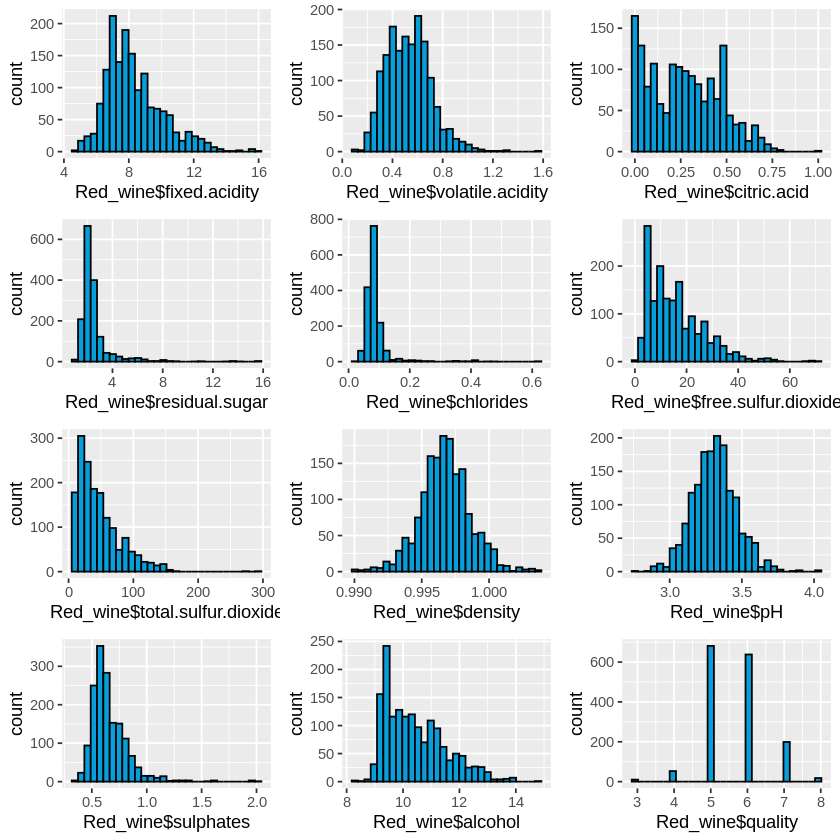

In [0]:
# Draw a histogram for a given dataframe and variable
draw_hist <- function(dataframe, variable)
{
  # Save histogram definition to the plot variable
  plot <- ggplot(data = dataframe, aes(x = variable)) + 
           geom_histogram(color = 'black', fill = '#099DD9') +
           xlab(deparse(substitute(variable)))
  return(plot)
}

# Build a matrix of small histograms with 3 columns
grid.arrange(draw_hist(Red_wine, Red_wine$fixed.acidity),
             draw_hist(Red_wine, Red_wine$volatile.acidity),
             draw_hist(Red_wine, Red_wine$citric.acid),
             draw_hist(Red_wine, Red_wine$residual.sugar),
             draw_hist(Red_wine, Red_wine$chlorides),
             draw_hist(Red_wine, Red_wine$free.sulfur.dioxide),
             draw_hist(Red_wine, Red_wine$total.sulfur.dioxide),
             draw_hist(Red_wine, Red_wine$density),
             draw_hist(Red_wine, Red_wine$pH),
             draw_hist(Red_wine, Red_wine$sulphates),
             draw_hist(Red_wine, Red_wine$alcohol),
             draw_hist(Red_wine, Red_wine$quality),
             ncol = 3)


AS we can see above in histograms **`density`** and **`PH`** normally disributed but the rest of variables are more or less right skewed. The **`quality`** dependent variable has  almost normal discrete distribution.


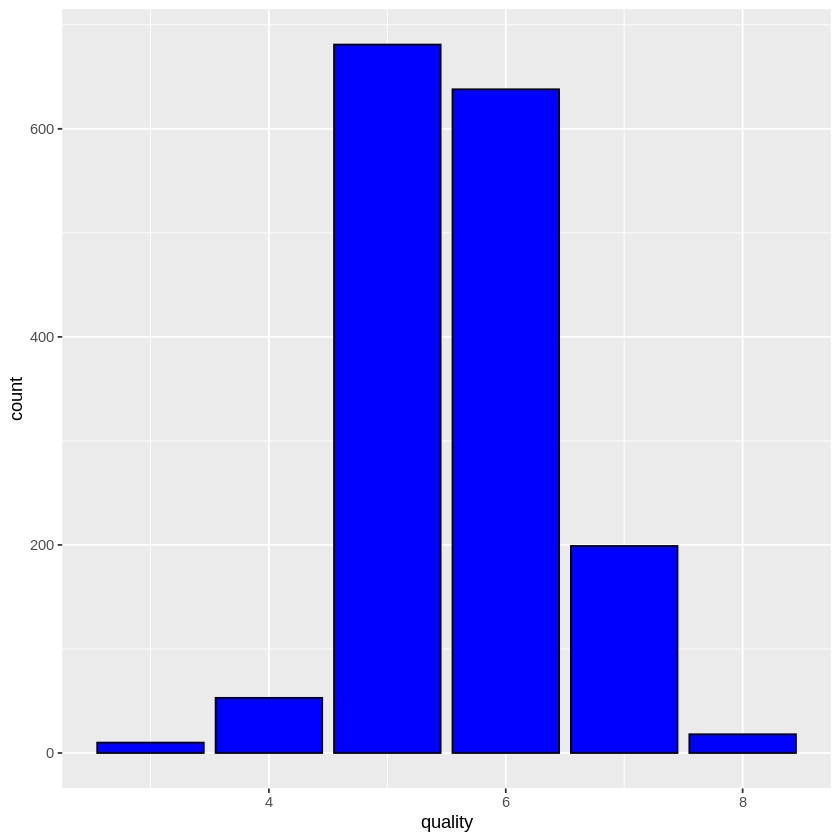

In [0]:
ggplot(aes(quality), data = Red_wine) +
  geom_bar(color = "black", fill = "blue")

Most wines between 5 and 6 .If we see rare win with high quality with rate 8 also with bad quality (3,4) rate .Rate 7 has almost 200 .We goning investigate more below about these different observations . 


[0,5)  [5,7) [7,10] 
    63   1319    217


   Low Medium   High 
    63   1319    217 

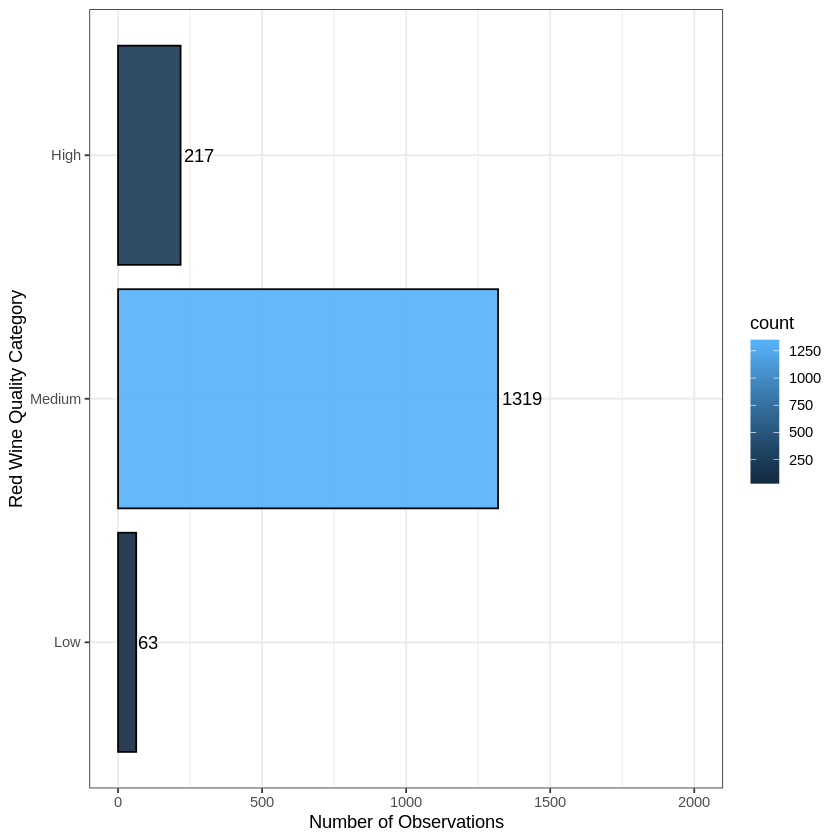

In [0]:

# Set boundaries for intervals
breaks <- c(0, 5, 7, 10)

Red_wine$quality.category <- cut(Red_wine$quality, breaks, include.lowest = TRUE, right = FALSE)

# Check intervals
summary(Red_wine$quality.category)

# Add labels 
labels <- c("Low", "Medium", "High")
Red_wine$quality.category <- cut(Red_wine$quality, breaks, include.lowest = TRUE, right = FALSE, labels=labels)


table(Red_wine$quality.category)

# Draw the result
y <- cbind(Red_wine, Red_wine$quality.category)
ggplot(data = y, aes(x = y$quality.category, fill = ..count..)) + 
  geom_bar(color = 'black', alpha = 0.9) + 
  stat_count(geom = "text", aes(label = ..count..), hjust = -0.1) +
  theme_bw() + 
  labs(y = "Number of Observations", x = "Red Wine Quality Category") +
  coord_flip() +
  ylim(0, 2000) +
  scale_x_discrete(drop = FALSE) 


As you can see above we demonstrating wine quality (LOW 0,5) , (Medium 5,7) 
(high 7,10 ) . We can see clearly most wine fill as Medium .The chart above make me confidence with the data quality no outlier   . 

In [0]:
#exclude (droping) index of the dataset
v0 <- names(Red_wine) %in% "X"
RE <- Red_wine[!v0]

# Create a function to compare the mean and median between highest, average and lowest 
mean_median <- function(func.) {
v1 <- data.frame(summarize_all(subset(RE, quality == 3),
                                      .funs= func.))
    

v2 <- data.frame(summarize_all(subset(RE, quality == 5 | 
                                      quality == 6), .funs= func.))
                                      
v3 <- data.frame(summarize_all(subset(RE, quality == 8),
                                      .funs= func.))

# this variable joins our three new data frames (v1, v2, v3) vertically. 
myvars <- rbind(v1, v2, v3)

myvars$quality = as.integer(myvars$quality)

# reorder the columns in our new dataframe
myvars [, c(12, 1:11) ]
}

head(Red_wine)

X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,quality.category
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Medium
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Medium
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Medium
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Medium
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Medium
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Medium




---



---


##mean for variables based on highest,average and lowest score. 


In [0]:
mean_median(mean)

Warning message in mean.default(quality.category):
“argument is not numeric or logical: returning NA”Warning message in mean.default(quality.category):
“argument is not numeric or logical: returning NA”Warning message in mean.default(quality.category):
“argument is not numeric or logical: returning NA”

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,8.360000,0.8845000,0.1710000,2.635000,0.12250000,11.00000,24.90000,0.9974640,3.398000,0.5700000,9.95500
5,8.254284,0.5385595,0.2582638,2.503867,0.08897271,16.36846,48.94693,0.9968673,3.311296,0.6472631,10.25272
8,8.566667,0.4233333,0.3911111,2.577778,0.06844444,13.27778,33.44444,0.9952122,3.267222,0.7677778,12.09444


In [0]:
summary(Red_wine$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.636   6.000   8.000 

The average mean quality of red wines is 5.63 and median is 6 .I think we have outliers here with free.sulfur and total.sulffur becuse the number dose it make since at all with reating . The wine samples with the highest score have the lowest level of density, volatile acidity, pH, and sugar the lowest score has the same median. 

So now the big question what's the factor has impact on wine values and rating . 
##attributes below increase values and rating
1.Alcohol 

2.fixed acidity

3.citric acid

4.sulphates


##attributes below decrease values and rating
1.Density 

2.volatile acidity

3.pH

4.sugar

In [0]:

RT <- function(variable, varName = '', bins = 30) {

#Print charts with outliers
## Building a Histogram:
histogram <- ggplot(data = Red_wine) +
    geom_histogram(aes(x = variable), bins = bins,
                   fill = 'blue', colour='black') +
    labs(x = varName)

## Building a boxplot:
boxplot <- ggplot(Red_wine, aes(x = 1, y = variable)) + 
    geom_boxplot(color = 'black', fill = 'blue') + 
    labs(x ='count', y = varName) + 
  coord_flip()

## Building density plot
density_plot <- ggplot(aes(x = variable, 
                           y = ..count../sum(..count..)), data = Red_wine ) +
geom_density(fill = 'blue', binwidth = 10) +
scale_x_continuous() +
 labs(x = varName, y = 'count')

## histogram with scale log10
histlog10 <- histogram + scale_x_log10() + 
    labs(x = paste('log10(', varName,')'))

## Arranging all the plots:
ggarrange(histogram, histlog10, density_plot, boxplot,  nrow = 4)               
        
}

##Fixed Acidity


I will shows below four biggest differentiators based on their variability regarding low and high quality and perform  analysis on how they relate to the quality level.


Warning message:
“Ignoring unknown parameters: binwidth”

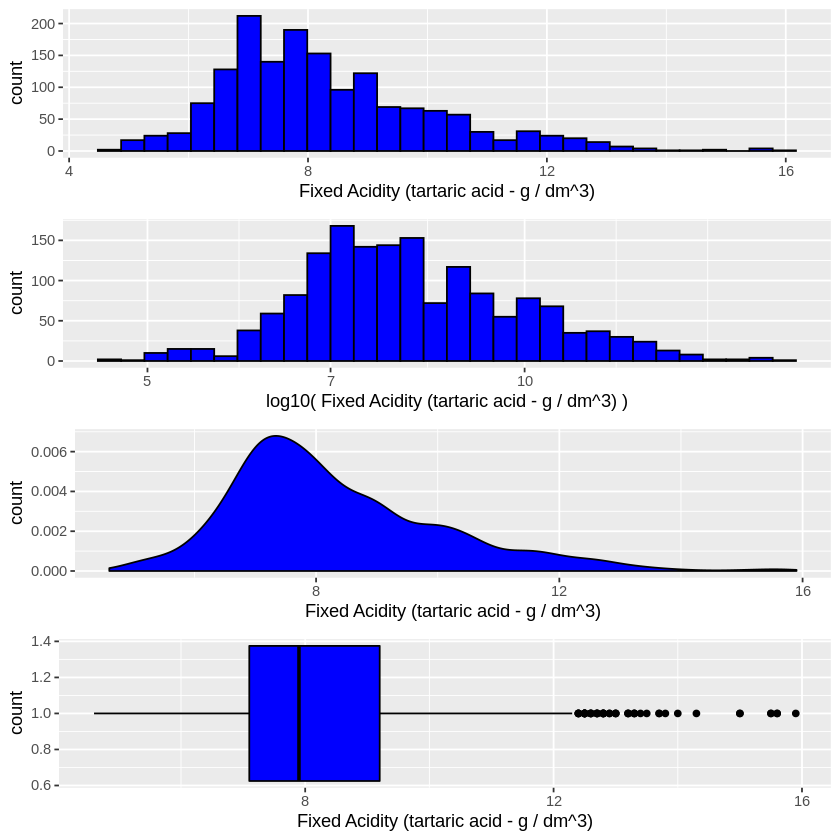

In [0]:
RT(Red_wine$fixed.acidity, 
        varName = 'Fixed Acidity (tartaric acid - g / dm^3)')

data above is lightly right skewed with minimum value of 4.5, maximum of 15.7 and median of 7 and mean of 8. The boxplot shows a few outliers from 12 to 16.

# ##Volatile Acidity


Warning message:
“Ignoring unknown parameters: binwidth”

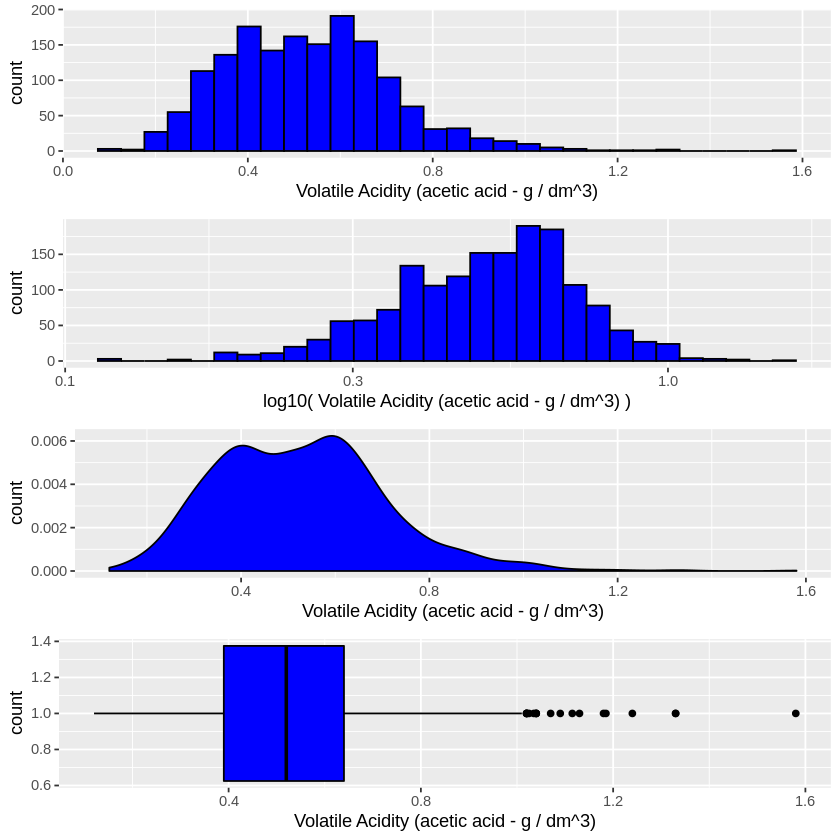

In [0]:
RT(Red_wine$volatile.acidity, 
        varName = 'Volatile Acidity (acetic acid - g / dm^3)')

In [0]:
summary(Red_wine$volatile.acidity)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1200  0.3900  0.5200  0.5278  0.6400  1.5800 

The variability between low and high quality categories is high comparing to other variables . There are a few outliers between the higher range, around 1.0 to 1.6 and median of 0.52 and mean of 0.52

*italicized text*##Citric Acid


Warning message:
“Ignoring unknown parameters: binwidth”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 132 rows containing non-finite values (stat_bin).”

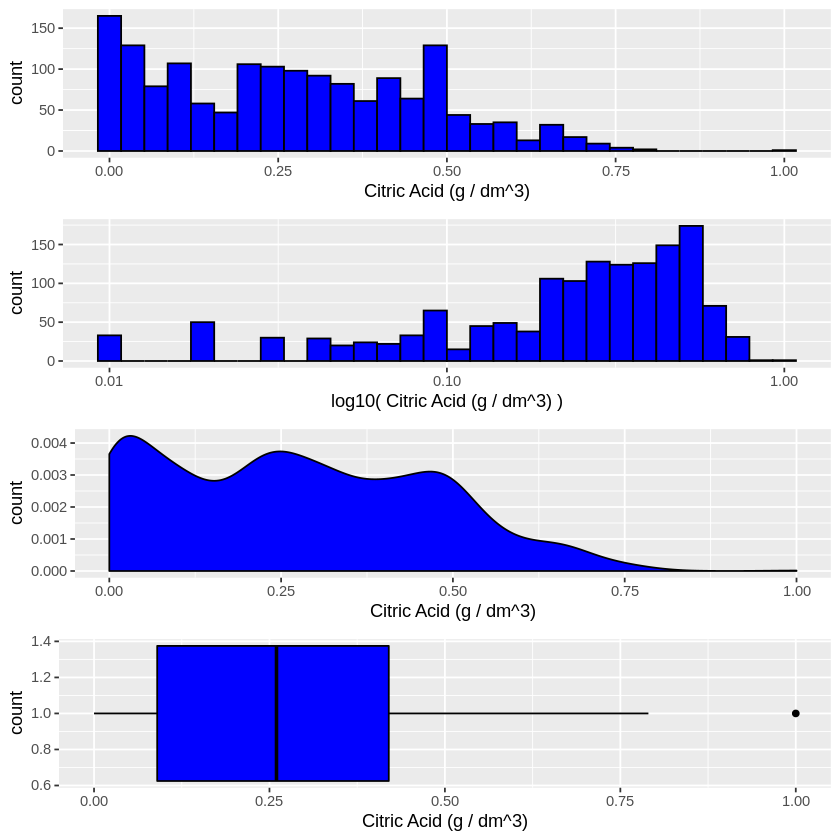

In [0]:
RT(Red_wine$citric.acid, varName = 'Citric Acid (g / dm^3)')


In [0]:
summary(Red_wine$citric.acid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.090   0.260   0.271   0.420   1.000 

Citric Acid data is right skewed with minimum value of 0, maximum of one outlayer and median of 0.26 and mean of 0.27. 

##Sugar

Warning message:
“Ignoring unknown parameters: binwidth”

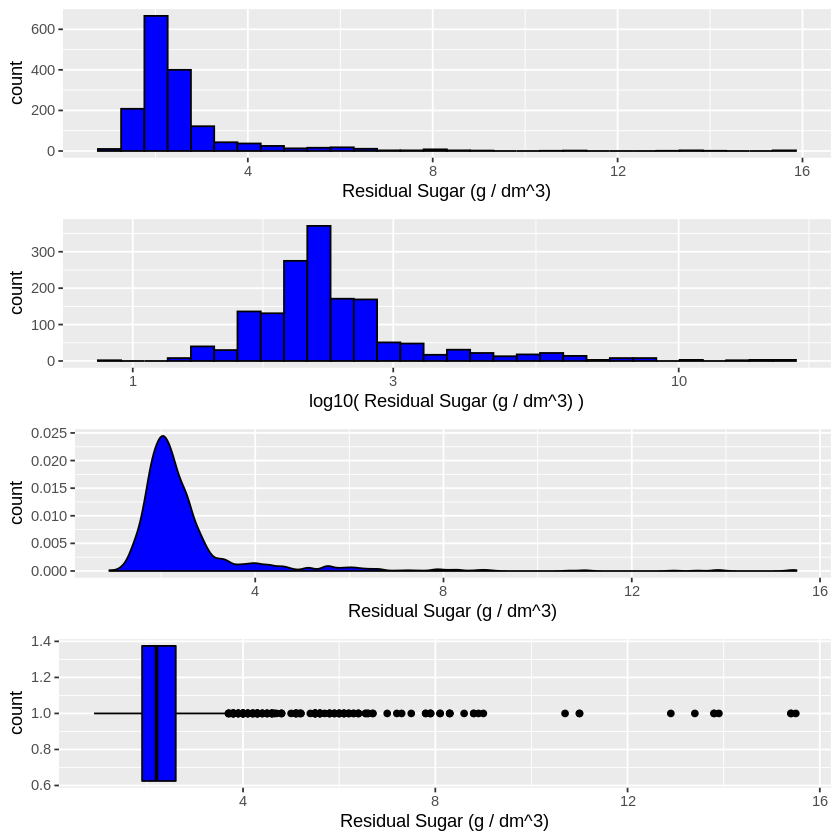

In [0]:
RT(Red_wine$residual.sugar, varName = 'Residual Sugar (g / dm^3)')


In [0]:
summary(Red_wine$residual.sugar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.900   1.900   2.200   2.539   2.600  15.500 

data is right skewed with minimum value of 3 , maximum of 15.8 many outliers here .and median of  2.2 and mean of 2.5 .

Warning message:
“Ignoring unknown parameters: binwidth”

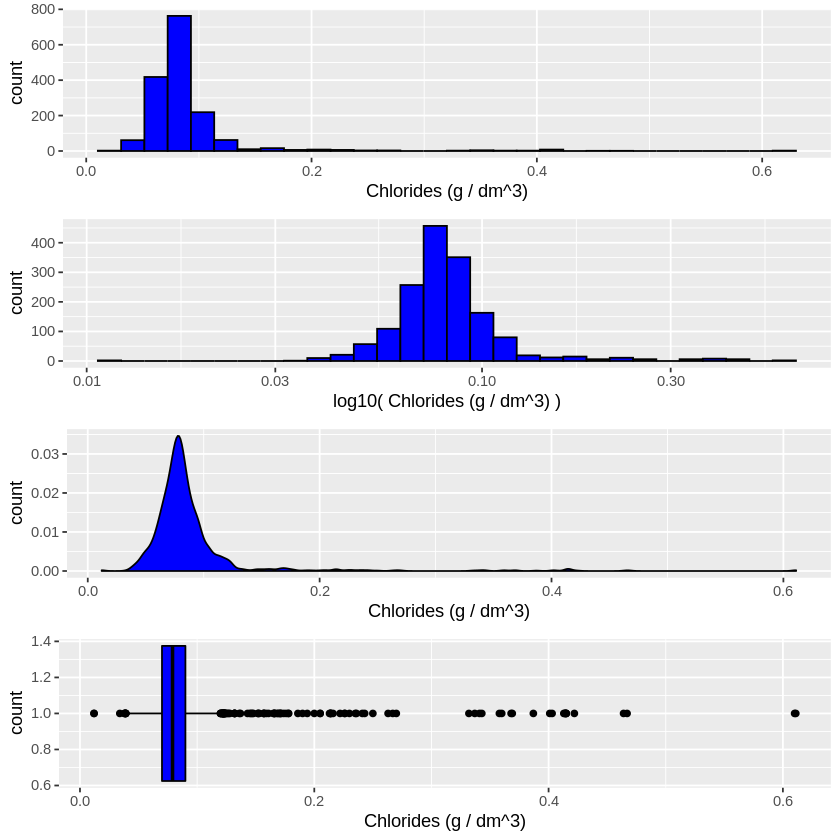

In [0]:
RT(Red_wine$chlorides, varName = 'Chlorides (g / dm^3)')


In [0]:
summary(Red_wine$chlorides)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01200 0.07000 0.07900 0.08747 0.09000 0.61100 

chlorides data is right skewed with minimum value of 0.012, maximum of 0.61  median of 0.079 and mean of 0.087.

##Free Sulfur Dioxide


Warning message:
“Ignoring unknown parameters: binwidth”

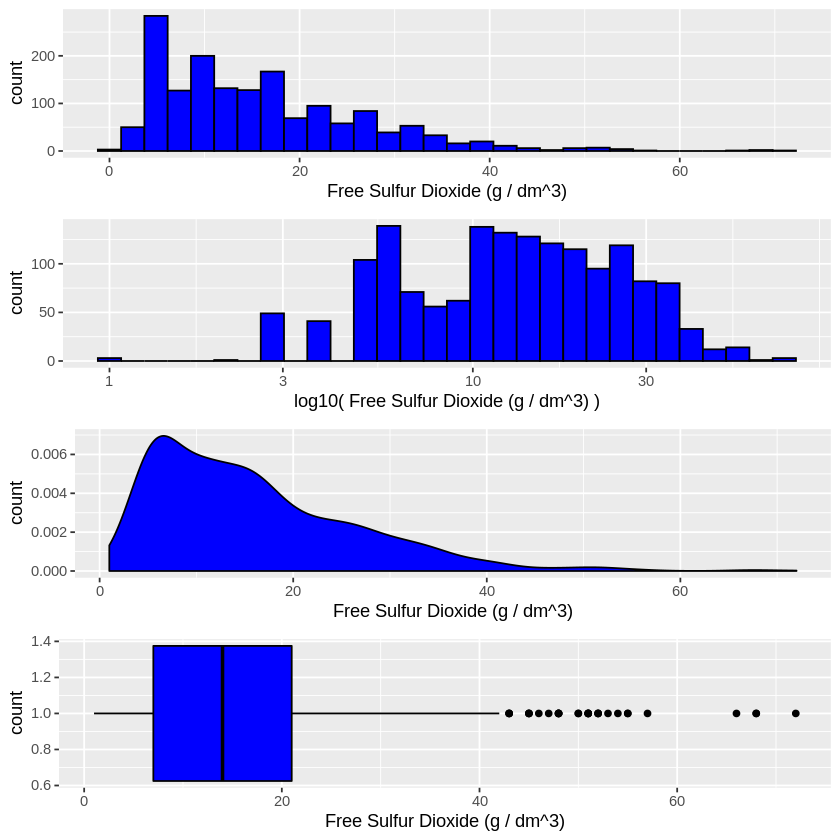

In [0]:
RT(Red_wine$free.sulfur.dioxide, 
        varName = 'Free Sulfur Dioxide (g / dm^3)')

In [0]:
summary(Red_wine$free.sulfur.dioxide)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   14.00   15.87   21.00   72.00 

Free Sulfur Dioxide data is right skewed with minimum value of 1, maximum of 72 and median of 14 and mean of 15.87.


##Total Sulfur Dioxide


Warning message:
“Ignoring unknown parameters: binwidth”

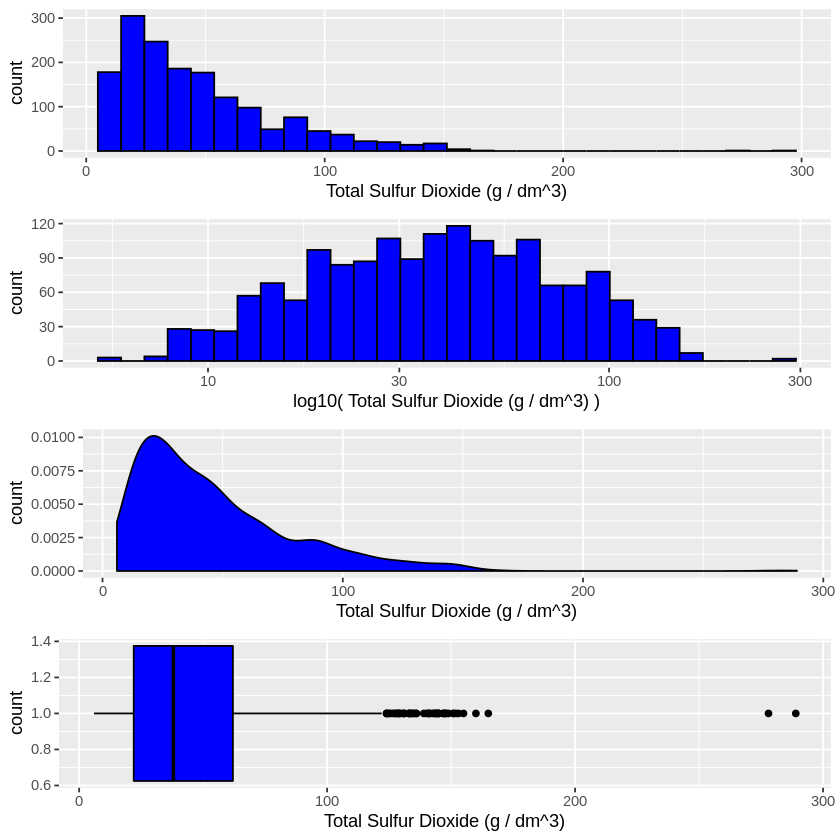

In [0]:
RT(Red_wine$total.sulfur.dioxide, 
        varName = 'Total Sulfur Dioxide (g / dm^3)')

In [0]:
summary(Red_wine$total.sulfur.dioxide)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   22.00   38.00   46.47   62.00  289.00 

Sulfur dioxide data is right skewed with minimum value of 6, maximum of 289 (outlayers) and median of 38 and mean of 46.47.

##Density

Warning message:
“Ignoring unknown parameters: binwidth”

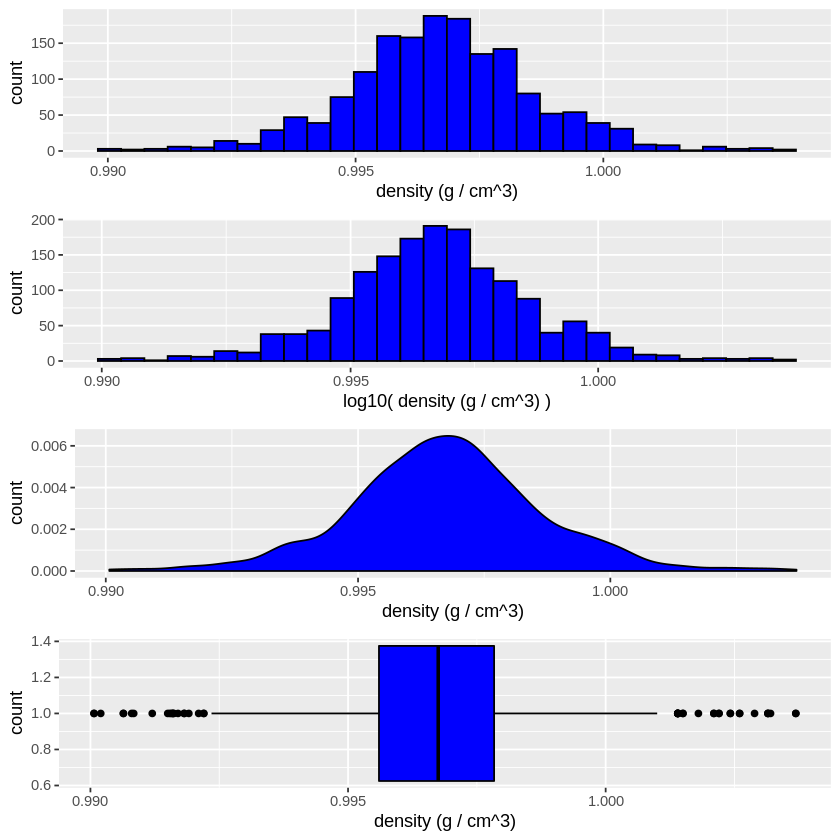

In [0]:
RT(Red_wine$density, 
        varName = 'density (g / cm^3)')

In [0]:
summary(Red_wine$density)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9901  0.9956  0.9968  0.9967  0.9978  1.0037 

density data is normal with minimum value of 0.9901, maximum of 1.0037 and median of 0.9968 and mean of 0.996

##pH


Warning message:
“Ignoring unknown parameters: binwidth”

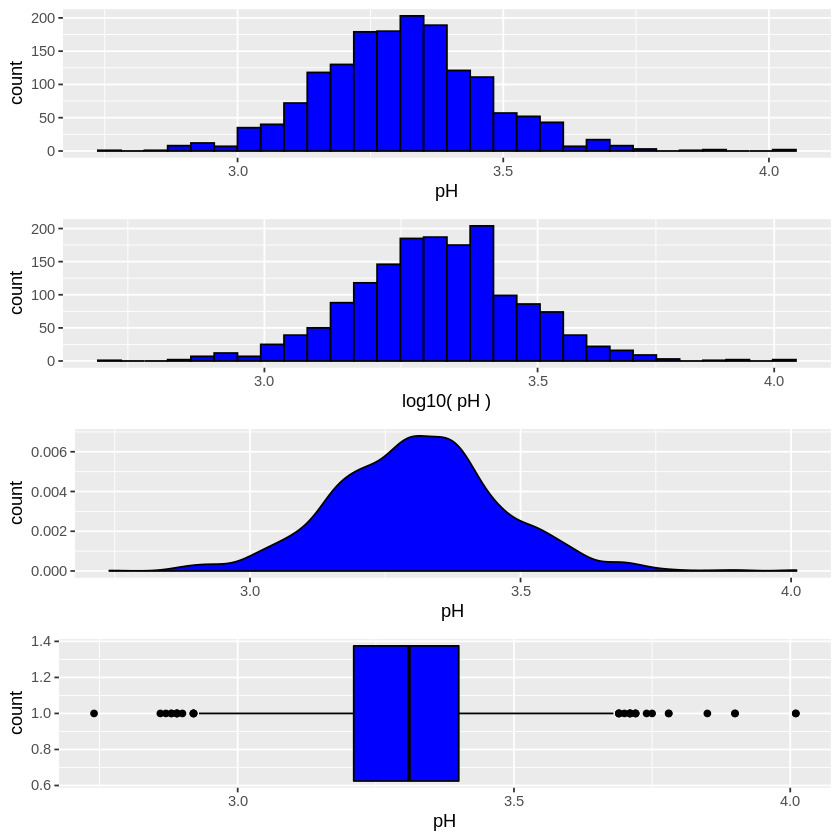

In [0]:
RT(Red_wine$pH, varName = 'pH')


In [0]:
summary(Red_wine$pH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.740   3.210   3.310   3.311   3.400   4.010 

pH data is normal with minimum value of 2.740, maximum of 4.010 and median of 3.310 and mean of 3.311.



##Sulphates

Warning message:
“Ignoring unknown parameters: binwidth”

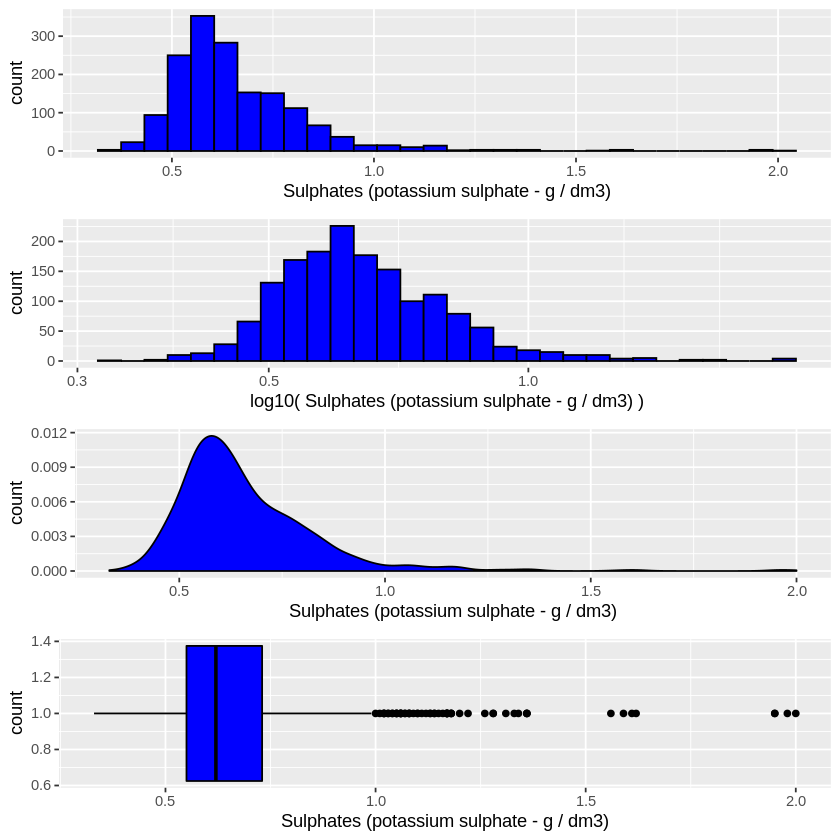

In [0]:
RT(Red_wine$sulphates, 
        varName = 'Sulphates (potassium sulphate - g / dm3)')

In [0]:
summary(Red_wine$sulphates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3300  0.5500  0.6200  0.6581  0.7300  2.0000 

sulphates data is right skewed with minimum value of 0.33, maximum of 2 and median of 0.62 and mean of 0.658

##Alcohol

Warning message:
“Ignoring unknown parameters: binwidth”

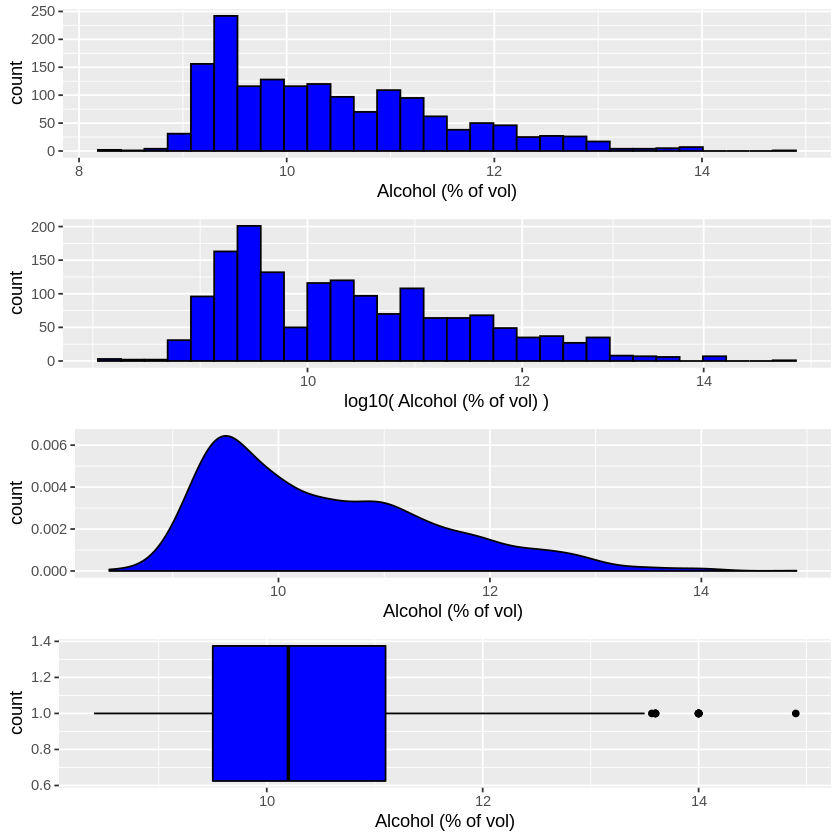

In [0]:

RT(Red_wine$alcohol, 
        varName = 'Alcohol (% of vol)')


alcohol data is right skewed but does not have many outliers with minimum value of 8.4, maximum of 14.9 and median of 10.2 and mean of 10.42.

In [0]:
summary(Red_wine$alcohol)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.40    9.50   10.20   10.42   11.10   14.90 

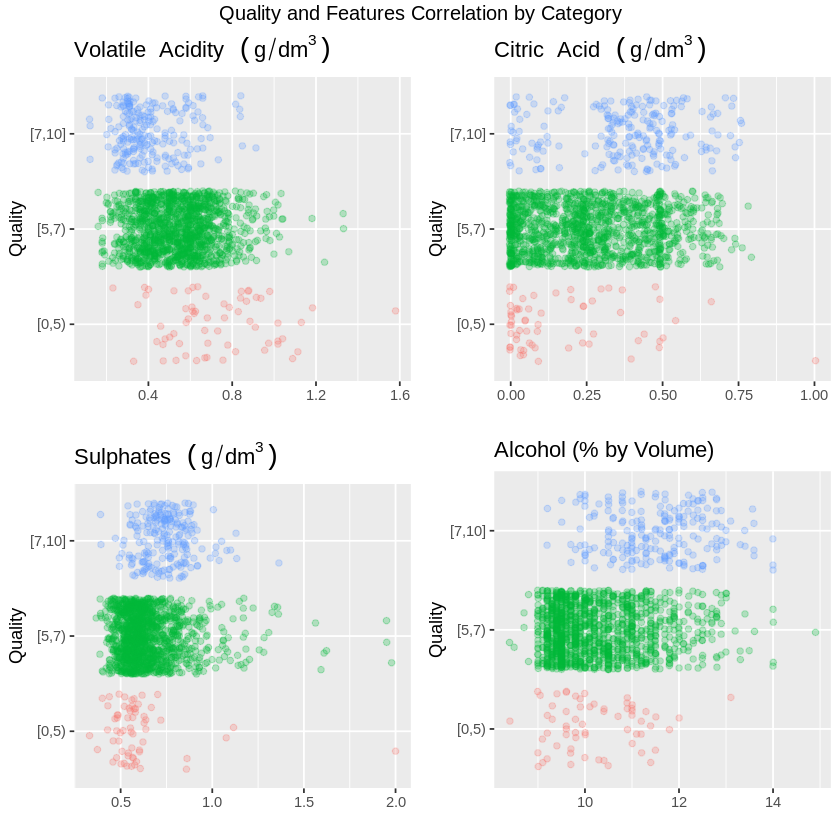

In [0]:
draw_main_quality_corrs <- function(dataframe, variable, title)
{
  plot <- ggplot(data = dataframe, aes(x = variable, y = quality.category)) + 
    geom_point(aes(color = quality.category), alpha = 1/4, position = 'jitter') +
    ggtitle(title) +
    xlab('') +
    ylab('Quality') +
    theme(legend.position = "none")
  return(plot)
}

draw_biv_summary <- function()
{
  grid.arrange(draw_main_quality_corrs(Red_wine, Red_wine$volatile.acidity, expression(Volatile~Acidity~(g/dm^{3}))),
             draw_main_quality_corrs(Red_wine, Red_wine$citric.acid, expression(Citric~Acid~(g/dm^{3}))),
             draw_main_quality_corrs(Red_wine, Red_wine$sulphates, expression(Sulphates~(g/dm^{3}))),
             draw_main_quality_corrs(Red_wine, Red_wine$alcohol, 'Alcohol (% by Volume)'),
             ncol = 2,
             top = 'Quality and Features Correlation by Category')
}

draw_biv_summary()

Less **volatile.acidity** in a sample results in higher wine quality,
* The bigger **citric.acid** level is in a sample on average the better quality of the sample is. The samples with **citric.acid** level above 0.5 will almost never be classsified as of Low quality,
* The bigger **sulphates** level is in a sample on average the better quality of the sample is. However, the **sulphates** values are less spread than values of other variables,
* Only **alcohol** level above 12 gives more certainty that the sample will be considered as of Medium or High quality. If the **alcohol** level goes below 10 a sample will most likely be considered as of a Medium or Low quality.

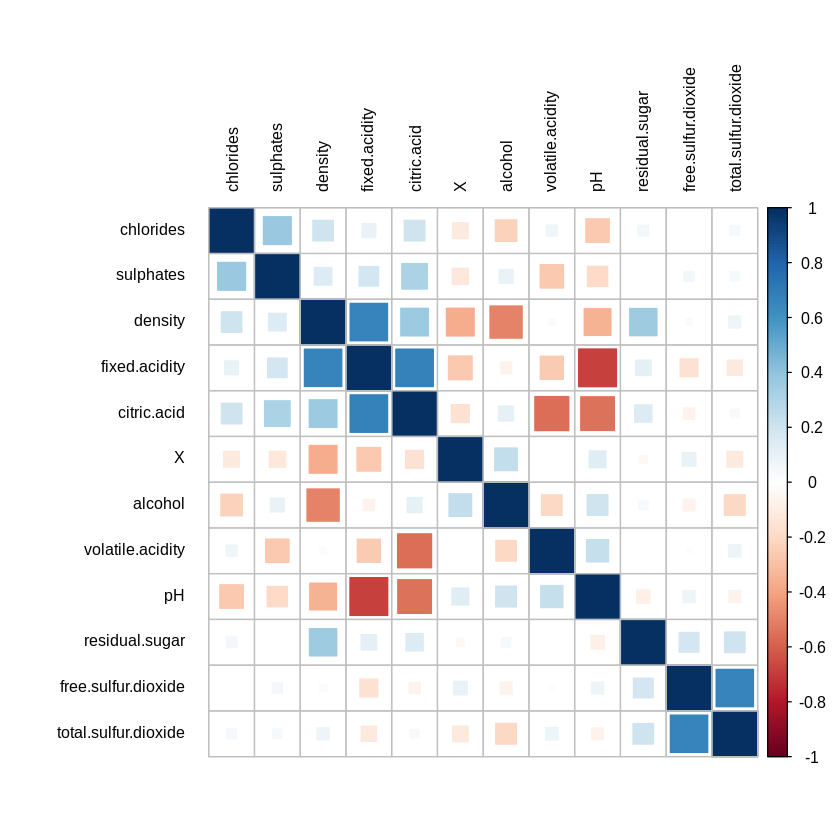

In [0]:
Red_wineCor <- cor(Red_wine[c(1:11, 12)])
# Draw a correlation matrix
corrplot(Red_wineCor, method = 'square', order = "hclust", 
         tl.col = "black", tl.cex = 0.8, tl.offset = 1)

The correlation matrix shows that **fixed.acidity** is highly positively correlated with **density** and **citric.acid**. **total.sulfur.dioxide** is highly positively correlated with **free.sulful.dioxide**. **pH** is highly negatively correlated with **fixed.acidity**. **citric.acid** is correlated negatively with **volatile.acidity** and **pH**

##Quality vs Alcohol


In [0]:
rw_boxplot <- function (variable1, varName = '',
                        variable2, varName1 = '') {
  
  boxplot <- ggplot(aes(x = factor(variable1), y = variable2), 
                    data = Red_wine) +
  geom_boxplot(color = 'black', fill = "lightblue") +
    labs(x = varName, y = varName1)
  plot(boxplot)
}


library(ggpubr)
#Bulding function to analyze continuos variables
rw_scatter <- function(varName = '', varName1 = '', 
                       varName2 = '', varName3 = '' ) {
                       

  #Building scatter plot 
  scatter <- ggscatter(Red_wine, x = varName, y = varName1,
              conf.int = TRUE, color = "orange",
              fill = "orange", cor.coef = TRUE, 
              cor.method = "pearson") +
    theme_dark() +
    labs(title = paste(varName2, "vs", varName3, "scatter plot"))
  
  # Building scatter plot and add a linear regression line
  scatter2 <- ggscatter(Red_wine, x = varName, y = varName1,
              add = "reg.line", conf.int = TRUE, color = "orange", 
              add.params = list(color = "grey20"), cor.coef = TRUE, 
              cor.method = "pearson", alpha = 0.3) +
    theme_dark() +
    labs(title = paste(varName2, "vs", varName3, 
                       "scatter plot with linear regression"))
  
  # Building scatter plot and add a fiting regression line
  scatter3 <- ggscatter(Red_wine, x = varName, y = varName1,
              add = "loess", conf.int = TRUE, color = "orange",
              add.params = list(color = "grey20"), cor.coef = TRUE,
              cor.method = "pearson", alpha = 0.3) +
    theme_dark() +
    labs(title = paste(varName2, "vs", varName3, 
                       "scatter plot with fiting regression"))
  
  ggarrange(scatter, scatter2, scatter3,  nrow = 3)
}

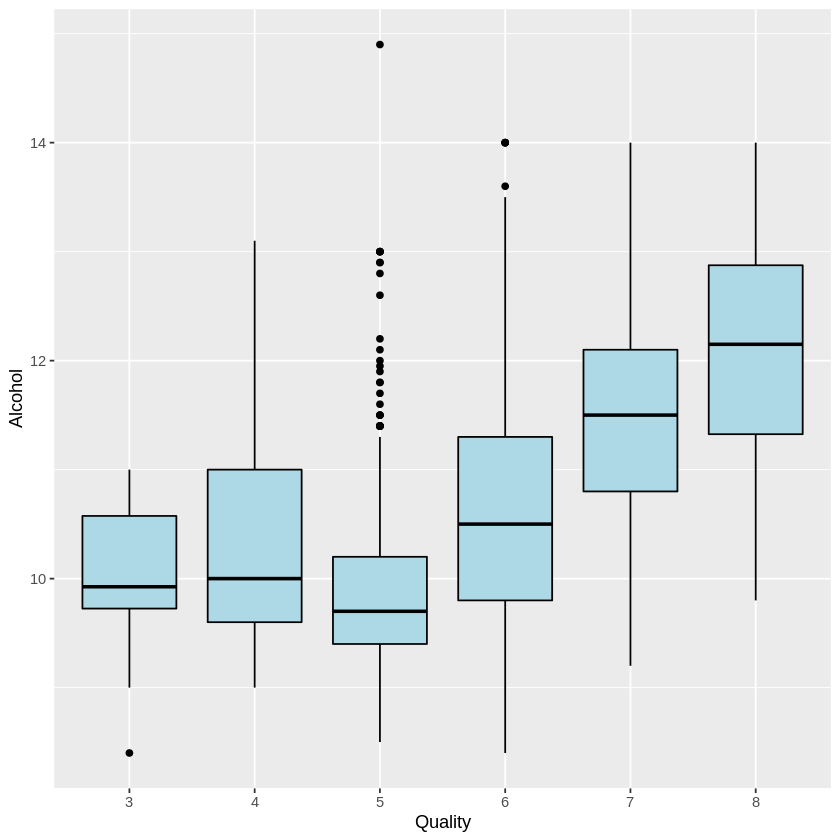

In [0]:
rw_boxplot(Red_wine$quality, varName = 'Quality', Red_wine$alcohol, 
           varName1 = 'Alcohol')

In [0]:
by(Red_wine$alcohol, Red_wine$quality, summary)


Red_wine$quality: 3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.400   9.725   9.925   9.955  10.575  11.000 
------------------------------------------------------------ 
Red_wine$quality: 4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00    9.60   10.00   10.27   11.00   13.10 
------------------------------------------------------------ 
Red_wine$quality: 5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.5     9.4     9.7     9.9    10.2    14.9 
------------------------------------------------------------ 
Red_wine$quality: 6
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.40    9.80   10.50   10.63   11.30   14.00 
------------------------------------------------------------ 
Red_wine$quality: 7
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.20   10.80   11.50   11.47   12.10   14.00 
------------------------------------------------------------ 
Red_wine$quality: 8
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.80   11.32   12.15   12.09

The trend between alcohol and quality is clearer, with the highest quality score having the largest median. In other words, the amount of alcohol increases with better quality raking. Additionally, most outliers have a score of 5, and that explains why the median is lower than score of 4.

###Final Plots and Summary

ِEvery variable distribution and density differences explored from different perspectives: through a histogram, a histogram with a log10 scale, density chart, and box plot for all variables. 80% wines have an average score Alcohol, fixed acidity, citric acid, sulphates increase with a better rating. Density, volatile acidity, pH, and sugar decrease with a better rating.

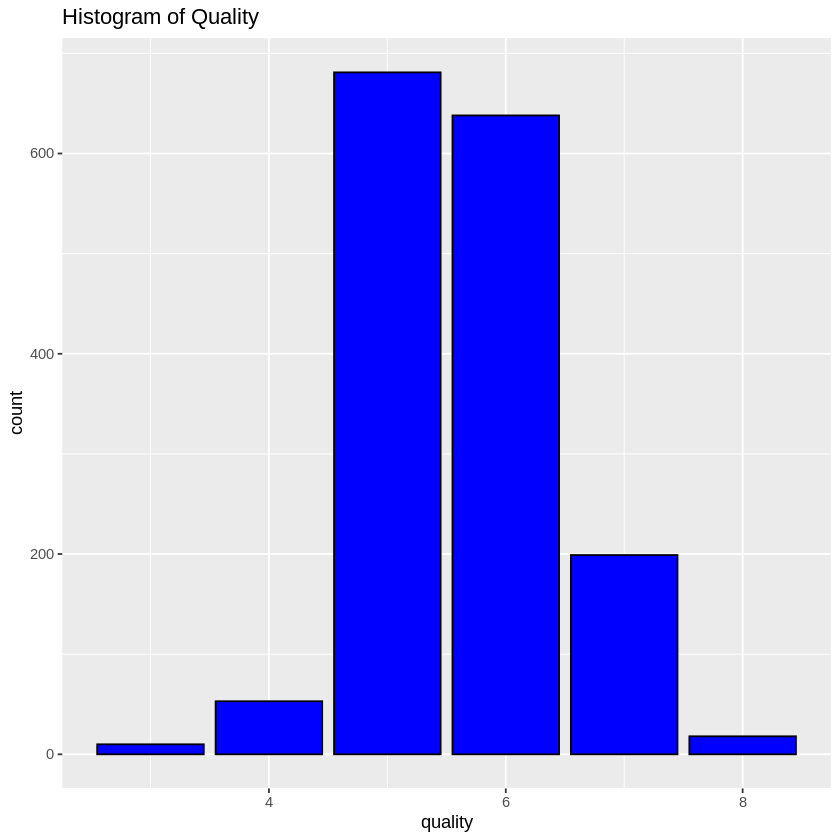

In [0]:
ggplot(aes(quality), data = Red_wine) +
  geom_bar(color = "black", fill = "blue") +
  ggtitle("Histogram of Quality")

Most wine samples are of 6 and 5 (almost 80% of the dataset). Moreover, it seems to be that wines which received the highest score (8) have a few observations. This situation repeats at a low level (3, 4). Wines with a score of 7 have 200 observations.

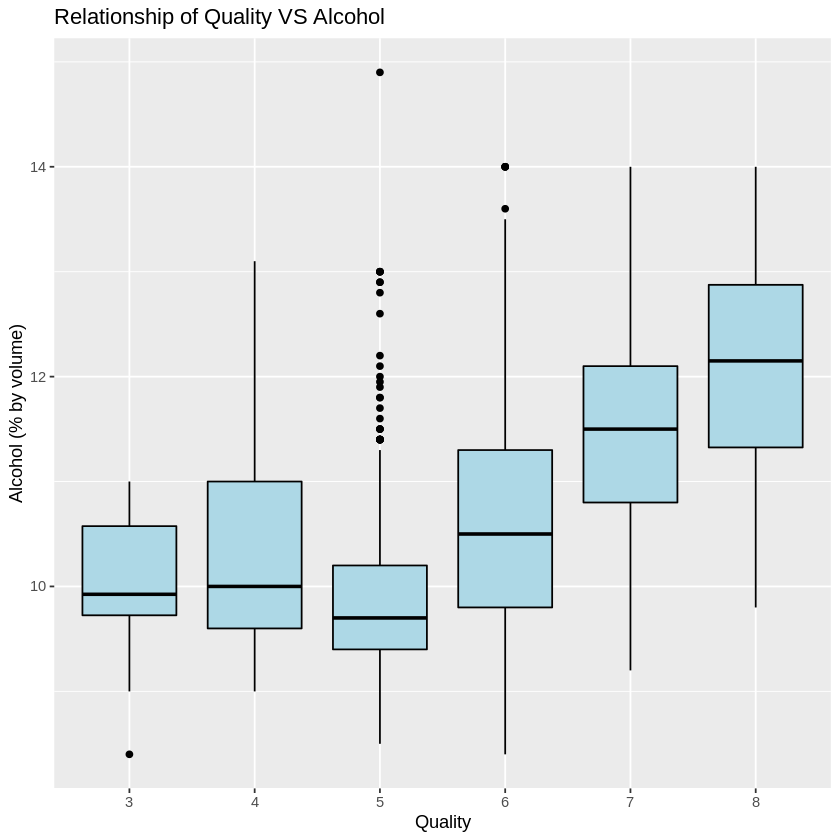

In [0]:
ggplot(aes(x = factor(quality), y = alcohol), 
                    data = Red_wine) +
  geom_boxplot(color = 'black', fill = "lightblue") +
    labs(x = 'Quality',
       y = 'Alcohol (% by volume)',
       title = 'Relationship of Quality VS Alcohol')

The trend between alcohol and quality is clearer, with the highest quality score having the largest median. In other words, the amont of alcohol increases with a better quality raking. Also, most outliers have a score of 5, and that explains why the median is lower than a score of 4.

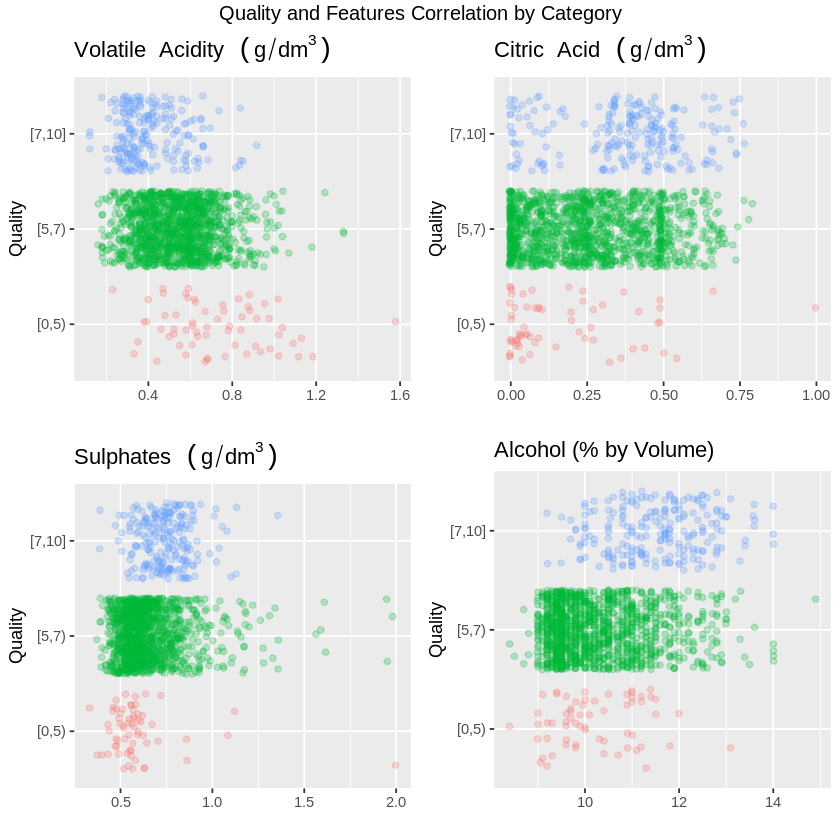

In [0]:
draw_biv_summary()


* Medium quality red wines have **alcohol** level between 9-12 and **volatile.acidity** level between 0.2-0.8.
* High quality red wines have **alcohol** level between 10-14 and **volatile.acidity** level between 0.2-0.6.
* Low quality red wines have **alcohol** level between 9-12 and **volatile.acidity** level between 0.4-1.2.

##Reflection

The red wine data set contains information on almost 1,600 red wine samples across 12 chemical properties .Almost 80% of our dataset received an average score (5,6) and the highest score (8) holds only 1% (18 rows) of observations.The mean was not totally reliable in a few attributes as sugar and chlorides. These attributes had a significant difference from the median .In the future, there could be more features added (grown country, weather conditions, wine making process specifics, etc.) to the dataset